## [뇌졸중 예측 데이터 분석] 
 * ---
 * 데이터 출처 : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
 
 * 데이터 분석 코드
   * [github 코드](https://github.com/LDJWJ/dataAnalysis/blob/main/----)
   * [HTML코드](https://ldjwj.github.io/dataAnalysis/----)

### 데이터 설명
```
Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient
```

### 라이브러리 불러오기

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


### 데이터 불러오기

In [3]:
dat = pd.read_csv("./data/StrokePrediction/healthcare-dataset-stroke-data.csv")
dat.shape

(5110, 12)

In [4]:
dat.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
dat.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* bmi 결측치 확인

In [8]:
# 예측하고자 하는 target 값 확인
dat['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

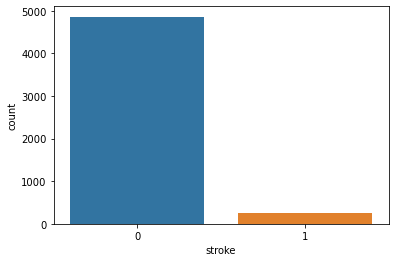

In [18]:
sns.countplot(x='stroke', data=dat)

In [19]:
dat.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### 데이터 나누기

In [24]:
dat.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
sel = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level']

X = dat[sel]
y = dat['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state = 0)

X_train.shape, X_test.shape

((3577, 5), (1533, 5))

### 모델 선택 및 학습, 평가

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train,y_train) )
print("테스트용 정확도 : ", model2.score(X_test,y_test) )

학습용 정확도 :  0.9521945764607213
테스트용 정확도 :  0.9484670580560991
학습용 정확도 :  0.9516354487000279
테스트용 정확도 :  0.9504240052185258


In [34]:
model3 = RandomForestClassifier(max_depth=4, n_estimators=500, random_state=0)
model3.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train,y_train) )
print("테스트용 정확도 : ", model2.score(X_test,y_test) )

학습용 정확도 :  0.9516354487000279
테스트용 정확도 :  0.9504240052185258
